In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [19]:
cast = pd.read_csv(r'D:\Downloads\pycon-pandas-tutorial-master\data\cast.csv')
print(cast.head())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


In [34]:
release_dates = pd.read_csv(
    r'D:\Downloads\pycon-pandas-tutorial-master\data\release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release_dates['month'] = release_dates['date'].dt.strftime('%b')
print(release_dates.head())

C:\Users\addis\AppData\Local\Temp\ipykernel_28888\2384816408.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  release_dates = pd.read_csv(


                    title  year      country       date month
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15   Jun
1                   #BKKY  2016     Cambodia 2017-10-12   Oct
2                 #Beings  2015      Romania 2015-01-29   Jan
3               #Captured  2017          USA 2017-09-05   Sep
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21   Jan


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

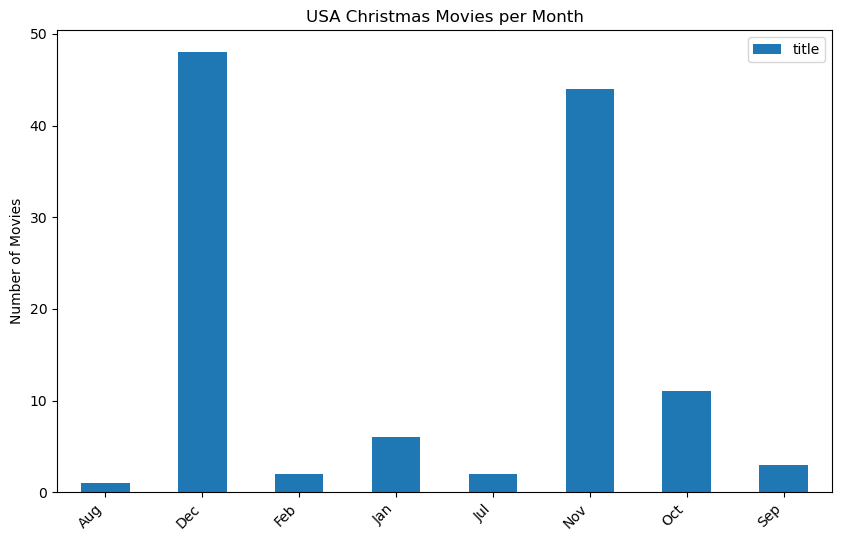

In [39]:
usa_christmas_movies = (
    release_dates
    .loc[(release_dates['title']
         .str
         .contains('Christmas',
                   case=False, 
                   na=False)) &
        (release_dates['country'] == 'USA')]
)

usa_christmas_movies_pivot = (
    usa_christmas_movies.
    pivot_table(
        index='month',
        values='title',
        aggfunc='count'
    )
)

usa_christmas_movies_pivot.plot(kind='bar', figsize=(10, 6))
plt.legend()
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Movies')
plt.title('USA Christmas Movies per Month')
plt.show()

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

<Axes: xlabel='month'>

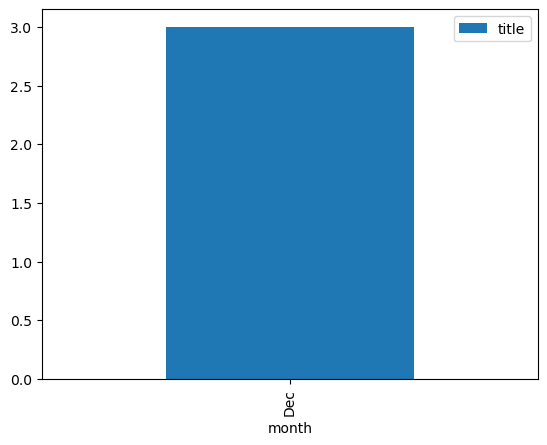

In [45]:
usa_hobbit_movies = (
    release_dates.loc[
        (
            release_dates['title']
            .str.startswith('The Hobbit'
                        ) 
        )
        &
        (
            release_dates['country'] == 'USA'
        )
    ]
)

usa_hobbit_movies_pivot = (
    usa_hobbit_movies.
    pivot_table(
        index='month',
        values='title',
        aggfunc='count'
    )
)

usa_hobbit_movies_pivot.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

### On which date was each Judi Dench movie from the 1990s released in the USA?

### In which months do films with Judi Dench tend to be released in the USA?

### In which months do films with Tom Cruise tend to be released in the USA?